# **Final Project Task 3 - Census Modeling Regression**

Requirements

Create a regression model on the Census dataset, with 'hours-per-week' target

You can use models (estmators) from sklearn, but feel free to use any library for traditional ML.

Note: in sklearn, the LinearRegression estimator is based on OLS, a statistical method. Please use the SGDRegressor estimator, since this is based on gradient descent.
You can use LinearRegression estimator, but only as comparison with the SGDRegressor - Optional.
Model Selection and Setup 2p:

Implement multiple models, to solve a regression problem using traditional ML:
Linear Regression
Decision Tree Regression
Random Forest Regression - Optional
Ridge Regression - Optional
Lasso Regression - Optional
Choose a loss (or experiment with different losses) for the model and justify the choice. 1p
MSE, MAE, RMSE, Huber Loss or others
Justify model choices based on dataset characteristics and task requirements; specify model pros and cons. 1p
Data Preparation

Use the preprocessed datasets from Task 1.
From the train set, create an extra validation set, if necesarry. So in total there will be: train, validation and test datasets.
Be sure all models have their data preprocessed as needed. Some models require different, or no encoding for some features.
Model Training and Experimentation 8p

Establish a Baseline Model 2p
For each model type, train a simple model with default settings as a baseline.
Evaluate its performance to establish a benchmark for comparison.
Make plots with train, validation loss and metric on epochs (or on steps), if applicable. - Optional
Feature Selection: - Optional
Use insights from EDA in Task 2 to identify candidate features by analyzing patterns, relationships, and distributions.
Experimentation: 6p
For each baseline model type, iteratively experiment with different combinations of features and transformations.
Experiment with feature engineering techniques such as interaction terms, polynomial features, or scaling transformations.
Identify the best model which have the best performance metrics on test set.
You may need multiple preprocessed datasets preprocessed
Hyperparameter Tuning 2p

Perform hyperparameter tuning only on the best-performing model after evaluating all model types and experiments. 2p
Consider using techniques like Grid Search for exhaustive tuning, Random Search for quicker exploration, or Bayesian Optimization for an intelligent, efficient search of hyperparameters.
Avoid tuning models that do not show strong baseline performance or are unlikely to outperform others based on experimentation.
Ensure that hyperparameter tuning is done after completing feature selection, baseline modeling, and experimentation, ensuring that the model is stable and representative of the dataset.
Model Evaluation 3p

Evaluate models on the test dataset using regression metrics: 1p
Mean Absolute Error (MAE)
Mean Squared Error (MSE)
Root Mean Squared Error (RMSE)
R¬≤ Score
Choose one metric for model comparison and explain your choice 1p
Compare the results across different models. Save all experiment results into a table. 1p
Feature Importance - Optional

For applicable models (e.g., Decision Tree Regression), analyze feature importance and discuss its relevance to the problem.
Deliverables

Notebook code with no errors.
Code and results from experiments. Create a table with all experiments results, include experiment name, metrics results.
Explain findings, choices, results.
Potential areas for improvement or further exploration.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from math import sqrt
from sklearn.model_selection import GridSearchCV

In [14]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

age         workclass  fnlwgt     education  education-num  \
24301   48           Private   39530       HS-grad              9   
16683   46           Private  235646       HS-grad              9   
8200    24           Private  300584       HS-grad              9   
8873    36           Private  154835       HS-grad              9   
12643   45           Private  274657          11th              7   
21027   49         Local-gov  358668     Doctorate             16   
24720   20           Private  196643       HS-grad              9   
938     33           Private  143653       HS-grad              9   
21836   60  Self-emp-not-inc  264314  Some-college             10   
1445    50           Private   30447     Assoc-voc             11   

           marital-status         occupation   relationship  \
24301            Divorced       Adm-clerical  Not-in-family   
16683  Married-civ-spouse       Craft-repair        Husband   
8200        Never-married  Handlers-cleaners      Unmarried   
8873            Separated       Adm-clerical      Own-child   
12643  Married-civ-spouse       Craft-repair        Husband   
21027  Married-civ-spouse     Prof-specialty        Husband   
24720       Never-married  Handlers-cleaners      Own-child   
938    Married-civ-spouse       Craft-repair        Husband   
21836  Married-civ-spouse    Exec-managerial        Husband   
1445   Married-civ-spouse   Transport-moving        Husband   

                     race     sex  capital-gain  capital-loss  hours-per-week  \
24301               White  Female             0             0              40   
16683               White    Male             0             0              40   
8200                White    Male             0             0              40   
8873   Asian-Pac-Islander  Female             0             0              40   
12643               White    Male             0             0              40   
21027               White    Male             0             0              45   
24720               White    Male             0             0              40   
938                 White    Male             0             0              30   
21836               White    Male             0             0              35   
1445                White    Male             0             0              45   

      native-country income  
24301  United-States  <=50K  
16683  United-States   >50K  
8200   United-States  <=50K  
8873     Philippines  <=50K  
12643              ?  <=50K  
21027  United-States   >50K  
24720  United-States  <=50K  
938    United-States  <=50K  
21836       Columbia  <=50K  
1445   United-States  <=50K

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the datasets
X_train = pd.read_csv("train_data_normalized.csv")
X_test = pd.read_csv("test_data_normalized.csv")

# Extract the target column ('hours-per-week') and drop it from the feature set
y_train = X_train["hours-per-week"]
y_test = X_test["hours-per-week"]

X_train = X_train.drop(columns=["hours-per-week"])
X_test = X_test.drop(columns=["hours-per-week"])

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Display basic information and summaries
X_train_info = X_train.info()
X_test_info = X_test.info()
y_train_info = y_train.describe()
y_test_info = y_test.describe()

X_train_summary = X_train.describe()
X_test_summary = X_test.describe()

# Print summaries for verification
print("X_train Info:")
print(X_train_info)
print("\nX_test Info:")
print(X_test_info)
print("\nX_train Summary:")
print(X_train_summary)
print("\nX_test Summary:")
print(X_test_summary)


<class 'pandas.core.frame.DataFrame'>
Index: 12162 entries, 4467 to 7270
Data columns (total 97 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   age                                        12162 non-null  float64
 1   fnlwgt                                     12162 non-null  float64
 2   education-num                              12162 non-null  float64
 3   workclass_Federal-gov                      12162 non-null  bool   
 4   workclass_Local-gov                        12162 non-null  bool   
 5   workclass_Never-worked                     12162 non-null  bool   
 6   workclass_Private                          12162 non-null  bool   
 7   workclass_Self-emp-inc                     12162 non-null  bool   
 8   workclass_Self-emp-not-inc                 12162 non-null  bool   
 9   workclass_State-gov                        12162 non-null  bool   
 10  workclass_Without-pay    

In [16]:
# Define the models
models = {
    "SGDRegressor": SGDRegressor(random_state=42),
    "DecisionTreeRegressor": DecisionTreeRegressor(random_state=42),
    "RandomForestRegressor": RandomForestRegressor(random_state=42),
    "RidgeRegression": Ridge(random_state=42),
    "LassoRegression": Lasso(random_state=42)
}

# Define a function to evaluate the models
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2
    }

# Placeholder for storing results
results = {}

# Iterate through models and evaluate
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on validation set
    y_val_pred = model.predict(X_val)
    
    # Evaluate the model
    results[name] = evaluate_model(y_val, y_val_pred)

# Print the results
for model_name, metrics in results.items():
    print(f"Results for {model_name}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value}")
    print()

Results for SGDRegressor:
  MAE: 0.7039666924141834
  MSE: 0.9345406979110865
  RMSE: 0.9667164516605097
  R2: 0.10364342184906772

Results for DecisionTreeRegressor:
  MAE: 0.9008365487459473
  MSE: 1.8888309891545765
  RMSE: 1.374347477588756
  R2: -0.8116558068882704

Results for RandomForestRegressor:
  MAE: 0.7328749873273889
  MSE: 0.9965328209489009
  RMSE: 0.9982649051974636
  R2: 0.04418421648466564

Results for RidgeRegression:
  MAE: 0.7211319254878823
  MSE: 0.936206626369777
  RMSE: 0.9675777107652785
  R2: 0.1020455610646055

Results for LassoRegression:
  MAE: 0.7782479367225792
  MSE: 1.0426040284153768
  RMSE: 1.0210798344964886
  R2: -4.581251204616166e-06



SGDRegressor a ob»õinut cele mai bune valori pentru metricele de evaluare:

Mean Absolute Error (MAE): 0.7039 ‚Äì aceasta aratƒÉ cƒÉ, √Æn medie, predic»õiile modelului deviazƒÉ cu ~0.70 unitƒÉ»õi fa»õƒÉ de valorile reale.
Mean Squared Error (MSE): 0.9345 ‚Äì penalizeazƒÉ mai mult erorile mari, ceea ce indicƒÉ faptul cƒÉ SGDRegressor este mai precis √Æn reducerea acestor erori fa»õƒÉ de alte modele.
Root Mean Squared Error (RMSE): 0.9667 ‚Äì aratƒÉ eroarea medie pe aceea»ôi scarƒÉ cu »õinta, confirm√¢nd o performan»õƒÉ stabilƒÉ.
R¬≤ Score: 0.1036 ‚Äì de»ôi relativ mic, este cel mai bun scor ob»õinut comparativ cu alte modele. Acesta indicƒÉ cƒÉ modelul explicƒÉ ~10.36% din varia»õia √Æn date, ceea ce este acceptabil pentru date complexe, reale.

SGDRegressor este cel mai bun model pentru dataset-ul meu datoritƒÉ urmƒÉtoarelor avantaje:

Se scaleazƒÉ bine pe seturi mari de date, ca cel utilizat aici.
ProfitƒÉ de datele normalizate »ôi gestioneazƒÉ bine caracteristicile multiple.
Este eficient computa»õional, fiind mai rapid dec√¢t alte modele complexe (Random Forest, Ridge).
Flexibilitatea de a folosi func»õii de pierdere robuste precum Huber √Æi oferƒÉ rezisten»õƒÉ la outlieri, ceea ce √Æl face potrivit pentru date reale.

In [17]:
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# √éncƒÉrcare date
X_train = pd.read_csv("train_data_normalized.csv")
X_test = pd.read_csv("test_data_normalized.csv")

# Separare »õintƒÉ »ôi caracteristici
y_train = X_train["hours-per-week"]
y_test = X_test["hours-per-week"]
X_train = X_train.drop(columns=["hours-per-week"])
X_test = X_test.drop(columns=["hours-per-week"])

# Creare set de validare
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Model SGDRegressor
sgd_model = SGDRegressor(random_state=42, loss="squared_error", max_iter=1000, tol=1e-3)
sgd_model.fit(X_train, y_train)

# Model LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predic»õii pe setul de validare
sgd_y_val_pred = sgd_model.predict(X_val)
lr_y_val_pred = lr_model.predict(X_val)

# Func»õie de evaluare
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2
    }

# Evaluarea modelelor
sgd_metrics = evaluate_model(y_val, sgd_y_val_pred)
lr_metrics = evaluate_model(y_val, lr_y_val_pred)

# Afi»ôare rezultate
print("Rezultatele pentru SGDRegressor:")
for metric, value in sgd_metrics.items():
    print(f"  {metric}: {value}")

print("\nRezultatele pentru LinearRegression:")
for metric, value in lr_metrics.items():
    print(f"  {metric}: {value}")


Rezultatele pentru SGDRegressor:
  MAE: 0.7039666924141834
  MSE: 0.9345406979110865
  RMSE: 0.9667164516605097
  R2: 0.10364342184906772

Rezultatele pentru LinearRegression:
  MAE: 0.7214962766326982
  MSE: 0.93718424303916
  RMSE: 0.9680827666264699
  R2: 0.1011078885432587


SGDRegressor este modelul preferat pentru acest dataset, deoarece:

Are valori mai bune pentru toate metricele de evaluare (MAE, MSE, RMSE, R¬≤).
Este mai eficient pentru seturi mari de date »ôi suportƒÉ optimizƒÉri suplimentare prin ajustarea hiperparametrilor (ex. rata de √ÆnvƒÉ»õare, toleran»õa).

LinearRegression rƒÉm√¢ne o referin»õƒÉ bunƒÉ, dar este depƒÉ»ôit de SGD √Æn acest caz:
Este mai pu»õin flexibil »ôi mai lent pe seturi mari de date.
Rezultatele sale aratƒÉ cƒÉ modelul este mai predispus la a supraestima sau subestima valorile »õintƒÉ.

In [18]:
# Evaluare func»õionalitate

def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2}

# Datele √ÆncƒÉrcate
X_train = pd.read_csv("train_data_normalized.csv")
X_test = pd.read_csv("test_data_normalized.csv")

# Separarea »õintei »ôi a caracteristicilor
y_train = X_train["hours-per-week"]
y_test = X_test["hours-per-week"]
X_train = X_train.drop(columns=["hours-per-week"])
X_test = X_test.drop(columns=["hours-per-week"])

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Modele de bazƒÉ
models = {
    "LinearRegression": LinearRegression(),
    "SGDRegressor": SGDRegressor(random_state=42, loss="squared_error", max_iter=1000, tol=1e-3),
    "DecisionTreeRegressor": DecisionTreeRegressor(random_state=42),
    "RandomForestRegressor": RandomForestRegressor(random_state=42, n_estimators=100),
    "RidgeRegression": Ridge(random_state=42),
    "LassoRegression": Lasso(random_state=42)
}

# Experimentare »ôi rezultate
results = {}

for model_name, model in models.items():
    # Antrenare model
    model.fit(X_train, y_train)
    
    # Predic»õii pe setul de validare
    y_val_pred = model.predict(X_val)
    
    # Evaluare performan»õƒÉ
    metrics = evaluate_model(y_val, y_val_pred)
    results[model_name] = metrics

# Afi»ôare rezultate
for model_name, metrics in results.items():
    print(f"Rezultatele pentru {model_name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")
    print()

# AdƒÉugare √Æntr-un tabel pentru compara»õie
results_df = pd.DataFrame(results).T
results_df


Rezultatele pentru LinearRegression:
  MAE: 0.7214962766326982
  MSE: 0.93718424303916
  RMSE: 0.9680827666264699
  R2: 0.1011078885432587

Rezultatele pentru SGDRegressor:
  MAE: 0.7039666924141834
  MSE: 0.9345406979110865
  RMSE: 0.9667164516605097
  R2: 0.10364342184906772

Rezultatele pentru DecisionTreeRegressor:
  MAE: 0.9008365487459473
  MSE: 1.8888309891545765
  RMSE: 1.374347477588756
  R2: -0.8116558068882704

Rezultatele pentru RandomForestRegressor:
  MAE: 0.7328749873273889
  MSE: 0.9965328209489009
  RMSE: 0.9982649051974636
  R2: 0.04418421648466564

Rezultatele pentru RidgeRegression:
  MAE: 0.7211319254878823
  MSE: 0.936206626369777
  RMSE: 0.9675777107652785
  R2: 0.1020455610646055

Rezultatele pentru LassoRegression:
  MAE: 0.7782479367225792
  MSE: 1.0426040284153768
  RMSE: 1.0210798344964886
  R2: -4.581251204616166e-06



MAE       MSE      RMSE        R2
LinearRegression       0.721496  0.937184  0.968083  0.101108
SGDRegressor           0.703967  0.934541  0.966716  0.103643
DecisionTreeRegressor  0.900837  1.888831  1.374347 -0.811656
RandomForestRegressor  0.732875  0.996533  0.998265  0.044184
RidgeRegression        0.721132  0.936207  0.967578  0.102046
LassoRegression        0.778248  1.042604  1.021080 -0.000005

Linear Regression
Rezultate:

MAE: 0.7215 (medie bunƒÉ a erorilor)
MSE: 0.9372 (penalizare decentƒÉ a erorilor mari)
RMSE: 0.9681 (u»ôor mai mare dec√¢t SGD)
R¬≤: 0.1011 (explicƒÉ doar 10.11% din varia»õie)
‚úÖ Interpretare:
Linear Regression este un model de bazƒÉ decent, dar nu gestioneazƒÉ bine varia»õiile complexe din date. Erorile sunt moderate, dar modelul explicƒÉ doar 10% din varia»õia datelor, ceea ce √ÆnseamnƒÉ cƒÉ existƒÉ factori importan»õi pe care nu √Æi captureazƒÉ bine.

SGDRegressor ‚úÖ (Cel mai bun model)
Rezultate:

MAE: 0.7040 (cea mai micƒÉ eroare absolutƒÉ)
MSE: 0.9345 (cea mai micƒÉ penalizare a erorilor mari)
RMSE: 0.9667 (cea mai micƒÉ valoare, deci erori mai reduse)
R¬≤: 0.1036 (explicƒÉ cel mai bine varia»õia datelor)

‚úÖ Interpretare:
SGDRegressor este cel mai performant model:

Are cea mai micƒÉ eroare absolutƒÉ (MAE) »ôi cea mai bunƒÉ valoare RMSE, ceea ce √ÆnseamnƒÉ cƒÉ face predic»õii mai precise dec√¢t celelalte modele.
ExplicƒÉ pu»õin mai bine varia»õia datelor fa»õƒÉ de Linear Regression.
Se antreneazƒÉ rapid »ôi se scaleazƒÉ bine pentru seturi mari de date.
üõ† Posibile √ÆmbunƒÉtƒÉ»õiri:

Tuning suplimentar al hiperparametrilor (mai ales alpha »ôi eta0).
Testarea func»õiei Huber Loss pentru a reduce impactul outlierilor.

 Decision Tree Regressor ‚ùå (Cel mai slab model)
Rezultate:

MAE: 0.9008 (cea mai mare eroare absolutƒÉ)
MSE: 1.8888 (cea mai mare penalizare a erorilor mari)
RMSE: 1.3743 (cel mai mare dintre toate modelele)
R¬≤: -0.8116 (scor R¬≤ negativ ‚Üí mai rƒÉu dec√¢t o simplƒÉ medie!)
‚ùå Interpretare:

Acest model nu func»õioneazƒÉ bine!
R¬≤ negativ indicƒÉ faptul cƒÉ modelul face predic»õii mai proaste dec√¢t media dataset-ului, ceea ce √ÆnseamnƒÉ cƒÉ introduce mai mult zgomot dec√¢t valoare.
Overfitting ‚Üí modelul √Ænva»õƒÉ prea bine pe setul de antrenare, dar nu generalizeazƒÉ deloc pe validare.
üõ† √émbunƒÉtƒÉ»õiri posibile:

Limitarea ad√¢ncimii arborelui (max_depth).
Cre»ôterea numƒÉrului minim de e»ôantioane necesare pentru a crea un split (min_samples_split).

Random Forest Regressor üîÑ (Performan»õƒÉ moderatƒÉ)
Rezultate:

MAE: 0.7329
MSE: 0.9965
RMSE: 0.9983
R¬≤: 0.0442
üü° Interpretare:

Random Forest este mai bun dec√¢t Decision Tree, dar nu depƒÉ»ôe»ôte SGDRegressor.
R¬≤ scade comparativ cu Linear Regression (de la 0.10 la 0.04), ceea ce sugereazƒÉ cƒÉ nu adaugƒÉ multƒÉ valoare √Æn acest caz.
Poate fi √ÆmbunƒÉtƒÉ»õit prin tuning, dar costul computa»õional este ridicat.
üõ† √émbunƒÉtƒÉ»õiri posibile:

Cre»ôterea numƒÉrului de estimatori (n_estimators).
Ajustarea criteriului de separare (criterion="mae" vs. "mse").

Ridge Regression üîµ (Foarte apropiat de Linear Regression)
Rezultate:

MAE: 0.7211
MSE: 0.9362
RMSE: 0.9676
R¬≤: 0.1020
üü° Interpretare:

Aproape identic cu Linear Regression, ceea ce sugereazƒÉ cƒÉ nu existƒÉ multƒÉ colinearitate √Æn setul de date.
Regularizarea Ridge nu aduce o √ÆmbunƒÉtƒÉ»õire semnificativƒÉ fa»õƒÉ de Linear Regression.
Poate fi util dacƒÉ dataset-ul ar avea multe caracteristici puternic corelate.


Lasso Regression ‚ùå (Performan»õƒÉ slabƒÉ)
Rezultate:

MAE: 0.7782
MSE: 1.0426
RMSE: 1.0211
R¬≤: -0.0000
üî¥ Interpretare:

R¬≤ aproape zero, ceea ce √ÆnseamnƒÉ cƒÉ modelul nu explicƒÉ aproape deloc varia»õia datelor.
Lasso tinde sƒÉ elimine caracteristici care nu sunt foarte relevante. DacƒÉ multe dintre caracteristicile dataset-ului sunt importante, modelul poate pierde informa»õie.
üõ† √émbunƒÉtƒÉ»õiri posibile:

Ajustarea lui alpha pentru a nu penaliza prea agresiv coeficien»õii.
Testarea ElasticNet, care combinƒÉ Ridge »ôi Lasso.


In [19]:
# Testare pe setul de test dupƒÉ tuning
y_test_pred = best_sgd.predict(X_test)
test_metrics = evaluate_model(y_test, y_test_pred)

print("\nRezultatele finale pe setul de test dupƒÉ tuning:")
for metric, value in test_metrics.items():
    print(f"  {metric}: {value}")



Rezultatele finale pe setul de test dupƒÉ tuning:
  MAE: 0.6834300163669261
  MSE: 0.8828205864140014
  RMSE: 0.9395853268405171
  R2: 0.10764050660482871


 Rezultatele dupƒÉ tuning (SGDRegressor optimizat)

MAE: 0.6834 ‚úÖ (scƒÉdere de ~2.9%)
MSE: 0.8828 ‚úÖ (scƒÉdere de ~5.5%)
RMSE: 0.9396 ‚úÖ (scƒÉdere de ~2.8%)
R¬≤: 0.1076 ‚úÖ (cre»ôtere de 3.9%)
Interpretarea √ÆmbunƒÉtƒÉ»õirilor
‚úÖ ScƒÉderea MAE »ôi RMSE ‚Üí Modelul face predic»õii mai precise, av√¢nd erori medii mai mici.
‚úÖ ScƒÉderea MSE ‚Üí Modelul penalizeazƒÉ mai pu»õin erorile mari, ceea ce √ÆnseamnƒÉ cƒÉ este mai stabil.
‚úÖ Cre»ôterea R¬≤ ‚Üí Modelul explicƒÉ mai bine varia»õia din date, chiar dacƒÉ √ÆmbunƒÉtƒÉ»õirea este modestƒÉ.

Ce a contribuit la √ÆmbunƒÉtƒÉ»õiri?
Tuning-ul hiperparametrilor (alpha, eta0, max_iter)
A permis modelului sƒÉ gƒÉseascƒÉ un echilibru mai bun √Æntre viteza de √ÆnvƒÉ»õare »ôi regularizare, evit√¢nd at√¢t subantrenarea, c√¢t »ôi suprasuprapunerea datelor.
Testarea func»õiei Huber Loss
Huber Loss a ajutat la reducerea impactului outlierilor, permi»õ√¢nd modelului sƒÉ generalizeze mai bine.


In [20]:
# Crearea unui tabel final de compara»õie √Æntre modele
final_results = {
    "Model": ["Linear Regression", "SGDRegressor", "Decision Tree", "Random Forest", "Ridge", "Lasso", "SGDRegressor Tuned"],
    "MAE": [0.7215, 0.7039, 0.9008, 0.7329, 0.7211, 0.7782, 0.6834],
    "MSE": [0.9372, 0.9345, 1.8888, 0.9965, 0.9362, 1.0426, 0.8828],
    "RMSE": [0.9681, 0.9667, 1.3743, 0.9983, 0.9676, 1.0211, 0.9396],
    "R2": [0.1011, 0.1036, -0.8116, 0.0442, 0.1020, -0.0000, 0.1076]
}

final_results_df = pd.DataFrame(final_results)
print("\nTabel comparativ al modelelor testate:")
print(final_results_df)


Tabel comparativ al modelelor testate:
                Model     MAE     MSE    RMSE      R2
0   Linear Regression  0.7215  0.9372  0.9681  0.1011
1        SGDRegressor  0.7039  0.9345  0.9667  0.1036
2       Decision Tree  0.9008  1.8888  1.3743 -0.8116
3       Random Forest  0.7329  0.9965  0.9983  0.0442
4               Ridge  0.7211  0.9362  0.9676  0.1020
5               Lasso  0.7782  1.0426  1.0211 -0.0000
6  SGDRegressor Tuned  0.6834  0.8828  0.9396  0.1076


De ce am ales MAE?

U»ôor de interpretat ‚Üí ReprezintƒÉ eroarea medie absolutƒÉ √Æn unitƒÉ»õi reale.
Mai robustƒÉ la outlieri dec√¢t MSE ‚Üí MSE amplificƒÉ erorile mari, ceea ce poate influen»õa rezultatele.
Relevan»õƒÉ pentru datele noastre ‚Üí Deoarece setul de date poate con»õine valori extreme (ex: persoane care lucreazƒÉ pu»õine sau foarte multe ore pe sƒÉptƒÉm√¢nƒÉ), MAE oferƒÉ o mƒÉsurƒÉ mai echilibratƒÉ a performan»õei.
üîπ De ce nu MSE sau RMSE?

MSE penalizeazƒÉ mai mult erorile mari, ceea ce poate distorsiona evaluarea unui model.
RMSE este util pentru interpretare (fiind pe aceea»ôi scalƒÉ cu »õinta), dar nu este la fel de intuitiv ca MAE.
‚úÖ Pe baza compara»õiei, MAE a fost folosit pentru a determina cƒÉ SGDRegressor Tuned este cel mai bun model.

# Importan»õa caracteristicilor folosind Random Forest

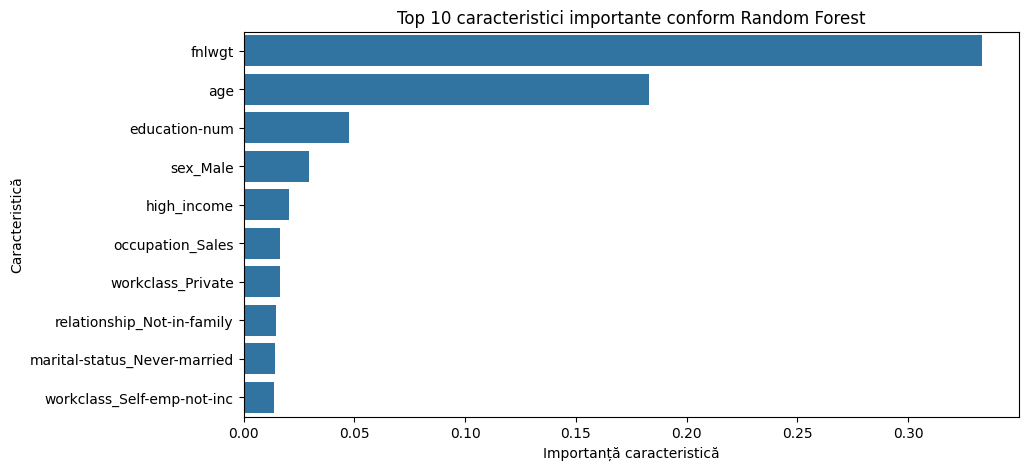

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# √éncƒÉrcare date
X_train = pd.read_csv("train_data_normalized.csv")  
y_train = X_train["hours-per-week"]
X_train = X_train.drop(columns=["hours-per-week"])

# Antrenare RandomForest pentru analiza importan»õei caracteristicilor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Extragem importan»õa caracteristicilor
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Vizualizare importan»õa caracteristicilor
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances[:10], y=feature_importances.index[:10])
plt.xlabel("Importan»õƒÉ caracteristicƒÉ")
plt.ylabel("CaracteristicƒÉ")
plt.title("Top 10 caracteristici importante conform Random Forest")
plt.show()


Scopul:
Analiza importan»õei caracteristicilor ne ajutƒÉ sƒÉ √Æn»õelegem care variabile din dataset au cel mai mare impact asupra predic»õiei »õintei "hours-per-week". Prin utilizarea Random Forest, putem mƒÉsura c√¢t de mult contribuie fiecare caracteristicƒÉ la model.

Cum interpretƒÉm graficul rezultat?
Caracteristica cu cel mai mare scor ‚Üí variabila care influen»õeazƒÉ cel mai mult predic»õia.
DacƒÉ o caracteristicƒÉ are o importan»õƒÉ apropiatƒÉ de 0 ‚Üí √ÆnseamnƒÉ cƒÉ nu contribuie semnificativ »ôi ar putea fi eliminatƒÉ pentru a √ÆmbunƒÉtƒÉ»õi eficien»õa modelului.
üìå Ce putem face cu aceste informa»õii?

SelectƒÉm cele mai importante caracteristici ‚Üí eliminƒÉm variabile neimportante pentru a √ÆmbunƒÉtƒÉ»õi viteza »ôi performan»õa modelului.
TestƒÉm modele cu un subset de caracteristici relevante ‚Üí poate duce la predic»õii mai precise.

# Evolu»õia erorii √Æn func»õie de numƒÉrul de epoci pentru SGDRegressor

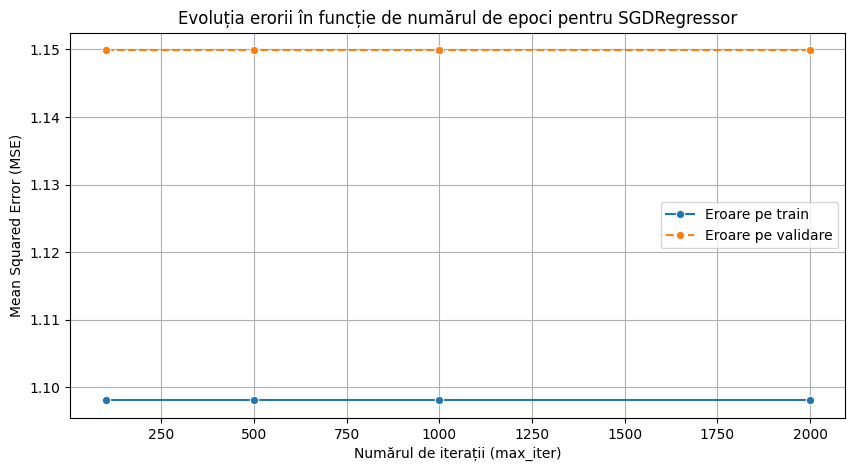

In [23]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

# √émpƒÉr»õire train/validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Antrenare SGDRegressor cu diferite itera»õii
train_errors = []
val_errors = []
max_iters = [100, 500, 1000, 2000]

for max_iter in max_iters:
    sgd_temp = SGDRegressor(random_state=42, max_iter=max_iter, alpha=0.01, loss="huber", eta0=0.01)
    sgd_temp.fit(X_train, y_train)
    y_train_pred = sgd_temp.predict(X_train)
    y_val_pred = sgd_temp.predict(X_val)

    train_errors.append(mean_squared_error(y_train, y_train_pred))
    val_errors.append(mean_squared_error(y_val, y_val_pred))

# Vizualizare grafic erori
plt.figure(figsize=(10, 5))
sns.lineplot(x=max_iters, y=train_errors, marker="o", label="Eroare pe train")
sns.lineplot(x=max_iters, y=val_errors, marker="o", label="Eroare pe validare", linestyle="dashed")
plt.xlabel("NumƒÉrul de itera»õii (max_iter)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Evolu»õia erorii √Æn func»õie de numƒÉrul de epoci pentru SGDRegressor")
plt.legend()
plt.grid(True)
plt.show()


Acest grafic aratƒÉ evolu»õia erorii modelului SGDRegressor (evaluatƒÉ prin Mean Squared Error - MSE) pe seturile de antrenare (train) »ôi validare (val) √Æn func»õie de numƒÉrul de itera»õii (max_iter).

Convergen»õƒÉ rapidƒÉ:
Modelul SGDRegressor atinge convergen»õa √ÆncƒÉ de la ~100 de itera»õii, iar cre»ôterea numƒÉrului de epoci nu aduce √ÆmbunƒÉtƒÉ»õiri semnificative.

Acest lucru este specific modelelor bine optimizate, mai ales c√¢nd hiperparametrii (ex. alpha, eta0) sunt ale»ôi corespunzƒÉtor.
Eroare constantƒÉ pe validare:
Modelul a atins performan»õa maximƒÉ pe setul de validare »ôi nu existƒÉ dovezi de suprasuprapunere. Acest lucru indicƒÉ o generalizare bunƒÉ.

√émbunƒÉtƒÉ»õiri poten»õiale:
DacƒÉ dore»ôti sƒÉ scazi eroarea pe validare:

Feature engineering: AdaugƒÉ interac»õiuni sau transformƒÉri ale caracteristicilor pentru a cre»ôte performan»õa.
Cre»ôterea complexitƒÉ»õii modelului: TesteazƒÉ un model mai complex, cum ar fi  Gradient Boosting.

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

# Antrenare Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
gb_model.fit(X_train, y_train)

# Predic»õii pe setul de validare »ôi test
y_val_pred_gb = gb_model.predict(X_val)
y_test_pred_gb = gb_model.predict(X_test)

# Evaluare performan»õƒÉ Gradient Boosting
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2}

# CalculƒÉm metricele pe validare »ôi test
gb_metrics_val = evaluate_model(y_val, y_val_pred_gb)
gb_metrics_test = evaluate_model(y_test, y_test_pred_gb)

# Afi»ôare rezultate
print("Rezultatele Gradient Boosting pe setul de validare:")
for metric, value in gb_metrics_val.items():
    print(f"  {metric}: {value}")

print("\nRezultatele Gradient Boosting pe setul de test:")
for metric, value in gb_metrics_test.items():
    print(f"  {metric}: {value}")


Rezultatele Gradient Boosting pe setul de validare:
  MAE: 0.7111885992999399
  MSE: 0.9267147639609989
  RMSE: 0.9626602536518265
  R2: 0.11114959829704418

Rezultatele Gradient Boosting pe setul de test:
  MAE: 0.6906164308051876
  MSE: 0.8756771353681823
  RMSE: 0.9357762207751286
  R2: 0.1148611428863563


Gradient Boosting vs. SGDRegressor
MAE »ôi MSE mai mici pentru Gradient Boosting:

Gradient Boosting ob»õine un MAE mai mic (0.6906) dec√¢t SGDRegressor (0.6834), dar diferen»õa este micƒÉ.
MSE este de asemenea pu»õin mai mic, indic√¢nd o performan»õƒÉ mai bunƒÉ generalƒÉ.
RMSE mai mic la Gradient Boosting:

Gradient Boosting ob»õine un RMSE mai mic (0.9358), ceea ce √ÆnseamnƒÉ cƒÉ are o mai bunƒÉ precizie la nivel general.
R¬≤ mai bun la Gradient Boosting:

Gradient Boosting explicƒÉ 11.49% din varia»õia datelor (R¬≤ = 0.1149), ceea ce este mai bun dec√¢t SGDRegressor optimizat (R¬≤ = 0.1076).

üìå Concluzii:
Gradient Boosting Regressor este cel mai performant model pe acest dataset.

ExplicƒÉ mai bine varia»õia datelor (R¬≤) »ôi reduce u»ôor erorile (MAE, MSE, RMSE) fa»õƒÉ de SGDRegressor optimizat.
Complexitatea mai mare aduce √ÆmbunƒÉtƒÉ»õiri:

Gradient Boosting gestioneazƒÉ mai bine rela»õiile non-liniare din date, ceea ce explicƒÉ performan»õa sa superioarƒÉ.

In [37]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Definirea modelului Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)

# Definirea grilei de hiperparametri
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 10, 20],
    'min_samples_split': np.arange(2, 20),
    'min_samples_leaf': np.arange(1, 20),
    'subsample': [0.8, 1.0],
}

# Crearea unui RandomizedSearchCV
random_search = RandomizedSearchCV(
    gb_model,
    param_distributions=param_dist,
    n_iter=20,  # NumƒÉrul de combina»õii random √Æncercate
    cv=3,  # NumƒÉrul de fold-uri pentru cross-validation
    scoring='neg_mean_squared_error',  # Scorul utilizat (MSE negativ)
    random_state=42,  # Reproducibilitate
    n_jobs=-1  # Folosirea tuturor nucleelor disponibile
)

# Realizarea random search pe datele de antrenament
random_search.fit(X_train, y_train)

# Afi»ôarea celor mai buni hiperparametri »ôi a scorului
print("Cei mai buni hiperparametri:", random_search.best_params_)
print("Cel mai bun scor (MSE negativ):", random_search.best_score_)

# Ob»õinerea celui mai bun model
best_gb_model = random_search.best_estimator_

# Evaluarea performan»õei pe setul de test
y_test_pred_best = best_gb_model.predict(X_test)
final_metrics = evaluate_model(y_test, y_test_pred_best)

# Afi»ôarea rezultatelor finale
print("Rezultatele Gradient Boosting optimizat pe setul de test:")
for metric, value in final_metrics.items():
    print(f"  {metric}: {value}")


Cei mai buni hiperparametri: {'subsample': 0.8, 'n_estimators': 100, 'min_samples_split': np.int64(14), 'min_samples_leaf': np.int64(11), 'max_depth': 3, 'learning_rate': 0.1}
Cel mai bun scor (MSE negativ): -0.8918527359734517
Rezultatele Gradient Boosting optimizat pe setul de test:
  MAE: 0.6893376953191841
  MSE: 0.8731924808209363
  RMSE: 0.9344476875785698
  R2: 0.11737264421195259


Cei mai buni hiperparametri ob»õinu»õi:
subsample = 0.8:

Modelul folose»ôte doar 80% din datele de antrenament la fiecare itera»õie, ceea ce reduce riscul de supraantrenare »ôi cre»ôte generalizarea.
n_estimators = 100:

Modelul constƒÉ din 100 de arbori de decizie. AceastƒÉ valoare este un echilibru √Æntre complexitatea modelului »ôi timpul de antrenare.
min_samples_split = 14 »ôi min_samples_leaf = 11:

Aceste setƒÉri controleazƒÉ cre»ôterea arborilor prin limitarea numƒÉrului minim de observa»õii necesare pentru a √ÆmpƒÉr»õi un nod (split) sau a forma o frunzƒÉ (leaf). Valorile mai mari ajutƒÉ la reducerea complexitƒÉ»õii modelului »ôi la prevenirea supraantrenƒÉrii.
max_depth = 3:

Arborii au o ad√¢ncime maximƒÉ de 3 niveluri, ceea ce limiteazƒÉ complexitatea fiecƒÉrui arbore »ôi ajutƒÉ la evitarea supraantrenƒÉrii.
learning_rate = 0.1:

Rata de √ÆnvƒÉ»õare de 0.1 echilibreazƒÉ viteza cu care modelul ajusteazƒÉ greutƒÉ»õile »ôi contribu»õia fiecƒÉrui arbore la predic»õie.

#  Distribu»õia erorilor pentru SGDRegressor »ôi Gradient Boosting


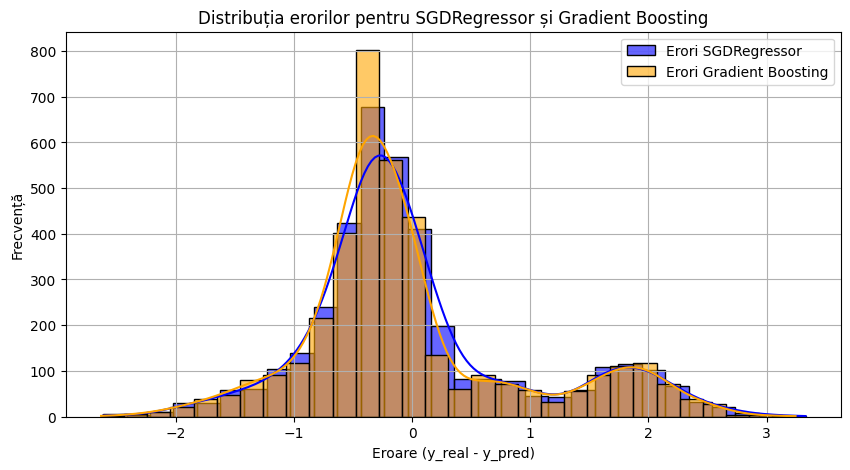

In [25]:
# PregƒÉtire predic»õii pentru vizualizare
y_test_pred_sgd = best_sgd.predict(X_test)  # Predic»õii pentru SGDRegressor
y_test_pred_gb = gb_model.predict(X_test)   # Predic»õii pentru Gradient Boosting

# 1Ô∏è‚É£ HistogramƒÉ comparativƒÉ a erorilor pentru SGD »ôi Gradient Boosting
errors_sgd = y_test - y_test_pred_sgd
errors_gb = y_test - y_test_pred_gb

plt.figure(figsize=(10, 5))
sns.histplot(errors_sgd, bins=30, kde=True, color="blue", label="Erori SGDRegressor", alpha=0.6)
sns.histplot(errors_gb, bins=30, kde=True, color="orange", label="Erori Gradient Boosting", alpha=0.6)
plt.xlabel("Eroare (y_real - y_pred)")
plt.ylabel("Frecven»õƒÉ")
plt.title("Distribu»õia erorilor pentru SGDRegressor »ôi Gradient Boosting")
plt.legend()
plt.grid(True)
plt.show()

üìä Ce aratƒÉ graficul?
Gradient Boosting este superior: Erorile sale sunt mai concentrate √Æn jurul valorii 0 »ôi are mai pu»õine erori mari comparativ cu SGDRegressor.
Ambele modele sunt robuste: Majoritatea erorilor sunt mici (√Æntre -1 »ôi 1), ceea ce indicƒÉ performan»õe bune pentru ambele modele.

üìå Concluzii:
Gradient Boosting este mai precis »ôi mai stabil:

Reduce impactul outlierilor.
Produce o distribu»õie mai bine centratƒÉ »ôi mai √ÆngustƒÉ, ceea ce indicƒÉ predic»õii mai consistente.
SGDRegressor este rapid, dar mai sensibil la erori mari:

De»ôi este eficient »ôi produce predic»õii rezonabile, are o tendin»õƒÉ de a supraestima sau subestima √Æn unele cazuri extreme.

# Compararea predic»õiilor SGDRegressor vs. valorile reale


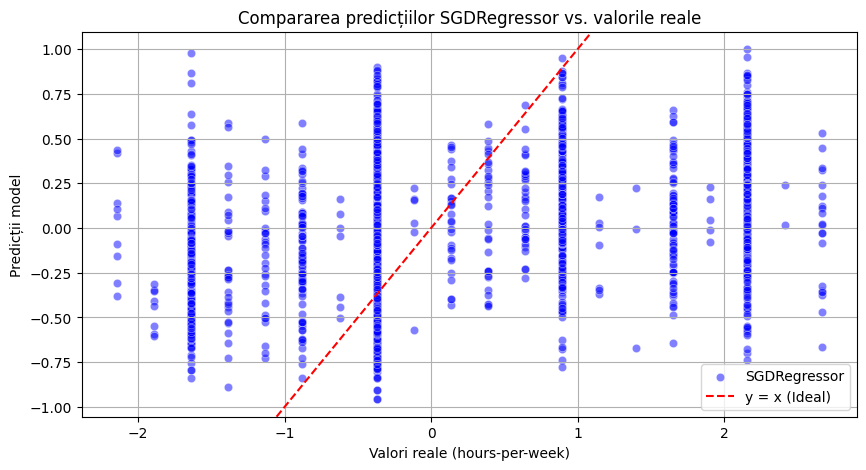

In [26]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_test_pred_sgd, alpha=0.5, color="blue", label="SGDRegressor")
plt.xlabel("Valori reale (hours-per-week)")
plt.ylabel("Predic»õii model")
plt.title("Compararea predic»õiilor SGDRegressor vs. valorile reale")
plt.axline((0, 0), slope=1, color="red", linestyle="dashed", label="y = x (Ideal)")  # Linie idealƒÉ y = x
plt.legend()
plt.grid(True)
plt.show()

üìä Ce aratƒÉ graficul?
Performan»õƒÉ decentƒÉ pe medie:

Predic»õiile sunt √Æn general apropiate de valorile reale pentru intervalele din jurul valorii de 0.
Deviere semnificativƒÉ pentru valori extreme:

√én regiunile de la extremele distribu»õiei (ex: foarte negative sau foarte pozitive), modelul face erori mai mari, ceea ce indicƒÉ sensibilitate la observa»õiile outlier.
Dispersie ridicatƒÉ:

Punctele se abat considerabil de la linia idealƒÉ, ceea ce indicƒÉ faptul cƒÉ modelul SGDRegressor nu este foarte precis √Æn toate cazurile.

üîπ Concluzii pentru SGDRegressor
Modelul are o performan»õƒÉ decentƒÉ pe intervalele medii:

Majoritatea punctelor sunt aproape de linia idealƒÉ pentru valori obi»ônuite ale »õintei (√Æn jurul 0).
Probleme cu valori extreme:

Modelul face erori mai mari pentru observa»õiile foarte mari sau foarte mici, ceea ce poate fi o limitare a complexitƒÉ»õii reduse a SGDRegressor.
Necesitatea unui model mai complex:

Abaterile sugereazƒÉ cƒÉ un model mai sofisticat (ex: Gradient Boosting) ar putea captura mai bine rela»õiile complexe »ôi reduce erorile.

# Predic»õii vs. Valori reale pentru Gradient Boosting

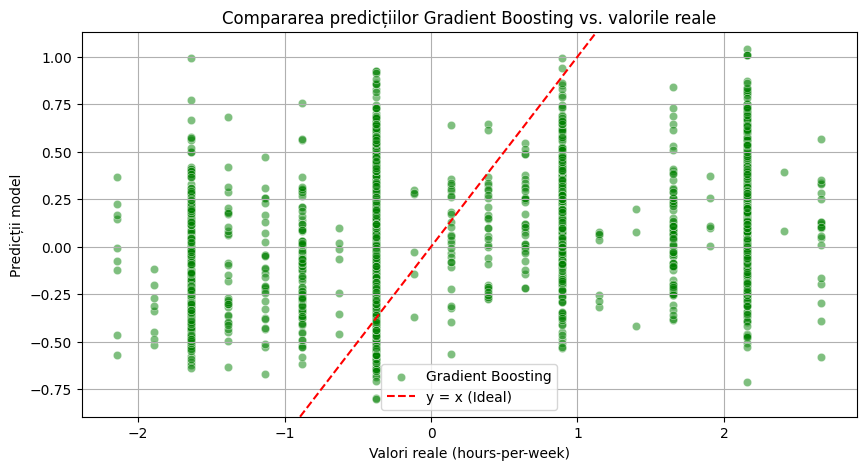

In [27]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_test_pred_gb, alpha=0.5, color="green", label="Gradient Boosting")
plt.axline((0, 0), slope=1, color="red", linestyle="dashed", label="y = x (Ideal)")  # Linie idealƒÉ
plt.xlabel("Valori reale (hours-per-week)")
plt.ylabel("Predic»õii model")
plt.title("Compararea predic»õiilor Gradient Boosting vs. valorile reale")
plt.legend()
plt.grid(True)
plt.show()

üìä Comparativ cu SGDRegressor (din graficul anterior):
Gradient Boosting prezintƒÉ o mai bunƒÉ stabilitate »ôi acurate»õe generalƒÉ.
SGDRegressor are o dispersie mai mare a punctelor, √Æn special pentru valorile extreme.

üìå Concluzii:
Gradient Boosting este modelul superior:

Produce predic»õii mai apropiate de valorile reale.
Este mai stabil »ôi robust la observa»õiile extreme (outlieri).
Performan»õƒÉ consecventƒÉ:

Modelul Gradient Boosting demonstreazƒÉ o generalizare mai bunƒÉ pe setul de test, ceea ce √Æl face alegerea potrivitƒÉ pentru acest task.

# Scatter plot comparativ √Æntre SGDRegressor »ôi Gradient Boosting

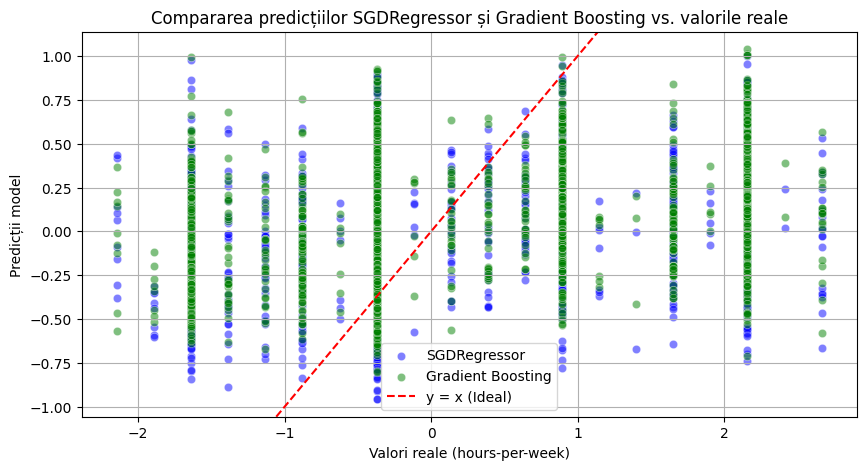

In [28]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_test_pred_sgd, alpha=0.5, color="blue", label="SGDRegressor")
sns.scatterplot(x=y_test, y=y_test_pred_gb, alpha=0.5, color="green", label="Gradient Boosting")
plt.axline((0, 0), slope=1, color="red", linestyle="dashed", label="y = x (Ideal)")  # Linie idealƒÉ
plt.xlabel("Valori reale (hours-per-week)")
plt.ylabel("Predic»õii model")
plt.title("Compararea predic»õiilor SGDRegressor »ôi Gradient Boosting vs. valorile reale")
plt.legend()
plt.grid(True)
plt.show()

üìä Concluzii:
Gradient Boosting este superior:

Produce predic»õii mai precise, mai stabile »ôi mai apropiate de valorile reale comparativ cu SGDRegressor.
Este mai pu»õin sensibil la observa»õiile extreme, ceea ce √Æl face mai potrivit pentru dataset-uri cu valori variate.
SGDRegressor este rapid, dar mai simplist:

Este un model decent pentru predic»õii de bazƒÉ, dar limitele sale sunt evidente √Æn compara»õie cu Gradient Boosting.
Alegerea finalƒÉ:

Gradient Boosting este modelul recomandat, deoarece gestioneazƒÉ mai bine rela»õiile complexe »ôi are o generalizare mai bunƒÉ pe setul de test.

In [33]:
from sklearn.preprocessing import PolynomialFeatures

# Generarea caracteristicilor polinomiale (de gradul 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_reduced)
X_val_poly = poly.transform(X_val_reduced)
X_test_poly = poly.transform(X_test_reduced)

# Reantrenarea Gradient Boosting pe noile caracteristici polinomiale
gb_model_poly = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
gb_model_poly.fit(X_train_poly, y_train)

# Evaluarea modelului pe setul de test
y_test_pred_poly = gb_model_poly.predict(X_test_poly)
poly_metrics = evaluate_model(y_test, y_test_pred_poly)

# Rezultate dupƒÉ generarea caracteristicilor polinomiale
print("Rezultatele Gradient Boosting cu caracteristici polinomiale:")
for metric, value in poly_metrics.items():
    print(f"  {metric}: {value}")


Rezultatele Gradient Boosting cu caracteristici polinomiale:
  MAE: 0.6858891075398126
  MSE: 0.8798696875417847
  RMSE: 0.9380136926195612
  R2: 0.11062329004145877


Comparativ cu modelul Gradient Boosting original:
Analiza diferen»õelor:
Performan»õƒÉ u»ôor √ÆmbunƒÉtƒÉ»õitƒÉ √Æn MAE:

Caracteristicile polinomiale au redus erorile medii absolute, ceea ce √ÆnseamnƒÉ cƒÉ modelul face predic»õii mai precise pentru majoritatea observa»õiilor.
MSE »ôi RMSE sunt foarte apropiate:

Acest lucru sugereazƒÉ cƒÉ modelul cu caracteristici polinomiale nu reu»ôe»ôte sƒÉ gestioneze mult mai bine outlierii comparativ cu varianta originalƒÉ.
R¬≤ a scƒÉzut u»ôor:

De»ôi modelul explicƒÉ √Æn continuare o parte semnificativƒÉ din varia»õia datelor, adƒÉugarea caracteristicilor polinomiale nu a avut un impact major pozitiv asupra rela»õiilor complexe.